In [2]:
import numpy as np # Çok boyutlu dizileri ve matrisleri destekleyen, bu diziler üzerinde çalışacak üst düzey matematiksel işlevler ekler
import pandas as pd # Veri okuma, temizleme, analiz etme ve işleme için kullanılır.
import seaborn as sns # Veri görselleştirmeyi sağlar.
import matplotlib.pyplot as plt #Temel ve esnek veri görselleştirme yapar.
import random #Rastgele sayılar/seçimler için kullanılır.

In [3]:
df = pd.read_csv("/content/sample_data/UberFaresDataset.csv")
#Bu satırda dosyadaki veriler pandas kütüphanesi tarafından okunur.
#df üzerinden çeşitli analizler ve işlemler yapılabilir.

In [4]:
print(df.isnull().sum()) #Eksik verilerin sayısını kontrol etme

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [5]:
# Sayısal sütunları seçme
num_columns = df.select_dtypes(include=[np.number]).columns  # Sayısal sütunların isimleri

# Her sayısal sütun için işlem
for col in num_columns:
    missing_data = df[df[col].isnull()]  # Eksik verilerin olduğu satırları bulma

    # Geçerli (eksik olmayan) verilerin istatistiklerini alma
    mean = df[col].mean()
    std = df[col].std()

    # Eksik verilere rastgele değer atama
    df.loc[df[col].isnull(), col] = np.random.normal(loc=mean, scale=std, size=missing_data.shape[0])


In [6]:
print(df.isnull().sum()) # Eksik verilerin sayısını tekrar kontrol ediyoruz

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [7]:
df.info()#Veri çerçevesi hakkında detaylı bilgiler sunar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  200000 non-null  float64
 7   dropoff_latitude   200000 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df.head(10) #Veri setinin ilk 10 satırını gösterir

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [9]:
df.tail(10) #Veri setinin son 10 satırını gösterir.

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199990,9577367,2015-05-24 22:05:56.0000002,12.0,2015-05-24 22:05:56 UTC,-73.987106,40.741894,-73.952240,40.772957,1
199991,13512837,2015-06-08 10:49:14.0000001,17.5,2015-06-08 10:49:14 UTC,-73.981453,40.743919,-74.013908,40.712635,1
199992,20566507,2010-01-30 16:24:00.000000199,8.9,2010-01-30 16:24:00 UTC,-74.003548,40.714045,-73.991053,40.684500,1
199993,28359558,2012-09-29 19:51:27.0000006,9.5,2012-09-29 19:51:27 UTC,-73.987798,40.721210,-73.980960,40.744388,1
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [10]:
df.describe()
#count: Sütundaki non-null (boş olmayan) değerlerin sayısı.
#mean: Sütundaki değerlerin ortalaması.
#std: Sütundaki değerlerin standart sapması.
#min: Sütundaki en küçük değer.
#25%: Alt çeyrek yüzdesi, sütundaki değerlerin %25'inin altında olan değer.
#50%: Medyan veya ortanca, sütundaki değerlerin yarısından küçük ve yarısından büyük olan değer.
#75%: Üst çeyrek yüzdesi, sütundaki değerlerin %75'inin altında olan değer.
#max: Sütundaki en büyük değer.

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525328,39.923875,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117385,6.794815,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


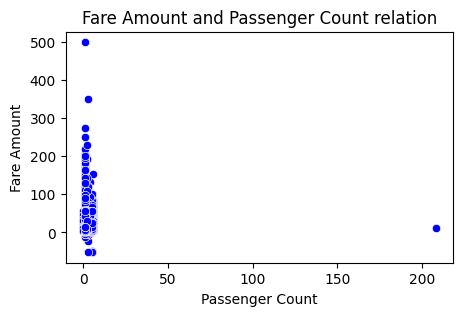

In [29]:
#Fare Amount ve Passenger Count arasındaki ilişkiyi gösteren scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df, color='blue')
plt.title('Fare Amount and Passenger Count relation')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

#Bu grafikte, yolcu sayısının artmasıyla birlikte ücret arasında bir ilişki
#olup olmadığını gözlemlenebilir.

<ipython-input-16-53b77531f3fa>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['pickup_datetime'].dt.to_period('M')


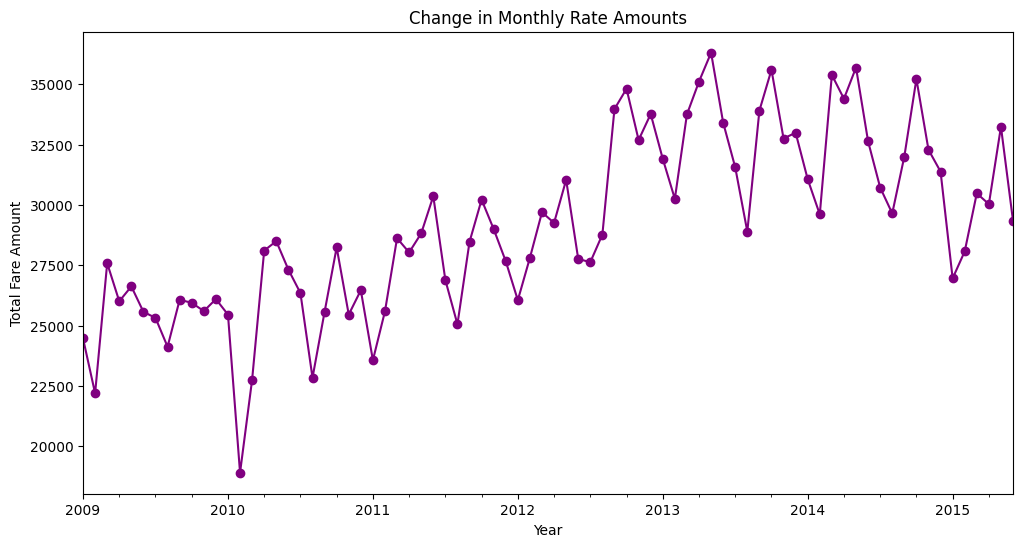

In [16]:
# Yıllık bazda ücret tutarı toplamlarını hesaplama
df['year_month'] = df['pickup_datetime'].dt.to_period('M')
monthly_fares = df.groupby('year_month')['fare_amount'].sum()

# Zaman serisi grafiği
plt.figure(figsize=(12, 6))
monthly_fares.plot(kind='line', color='purple', marker='o')
plt.title('Change in Monthly Rate Amounts')
plt.xlabel('Year')
plt.ylabel('Total Fare Amount')
plt.show()


In [27]:
df.passenger_count.unique().size # Veri setinde kaç farklı unique yolcu sayısı olduğunu görelim

8

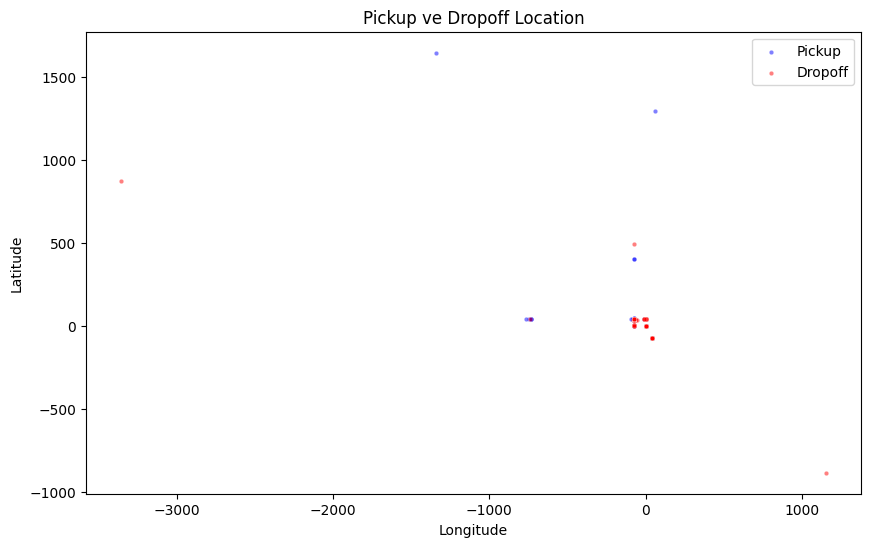

In [32]:
# Pickup ve Dropoff koordinatlarının harita üzerinde görselleştirilmesi
plt.figure(figsize=(10, 6))

# Pickup konumlarını scatter plot ile gösterelim
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, color='blue', alpha=0.5, label='Pickup', s=10)

# Dropoff konumlarını scatter plot ile gösterelim
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, color='red', alpha=0.5, label='Dropoff', s=10)

plt.title('Pickup ve Dropoff Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


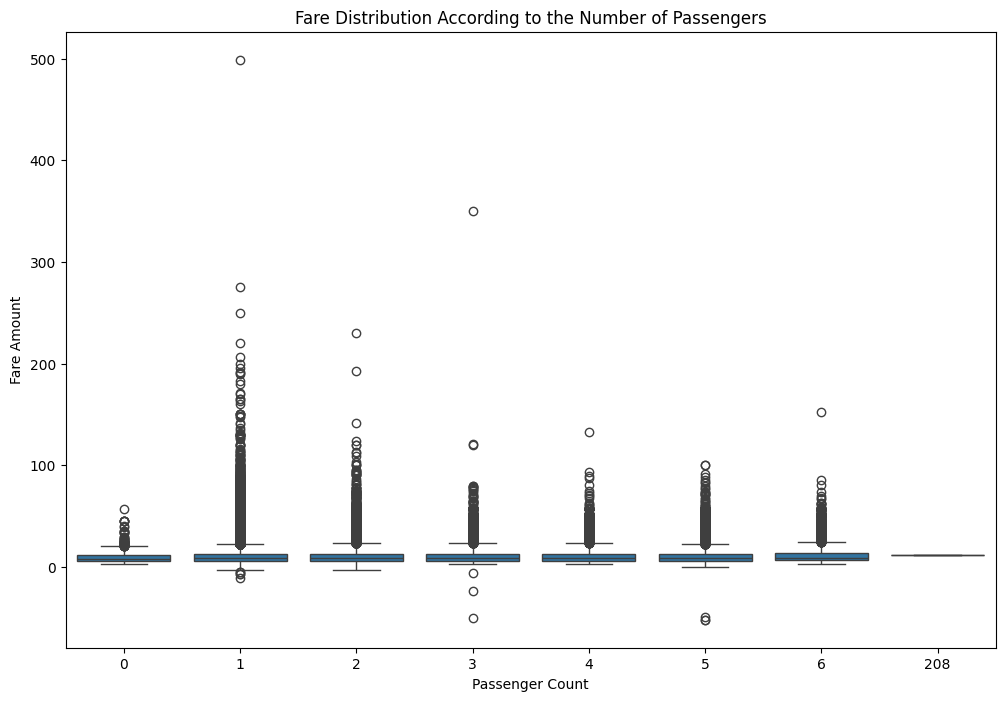

In [34]:
# Yolcu sayısına göre fare amount dağılımını kutu grafiği ile gösterme
plt.figure(figsize=(12, 8))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Distribution According to the Number of Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()
# yolcu sayısının artmasıyla ücretin nasıl değiştiğini gösterir ve
#potansiyel uç değerleri veya anormal durumları tespit eder.

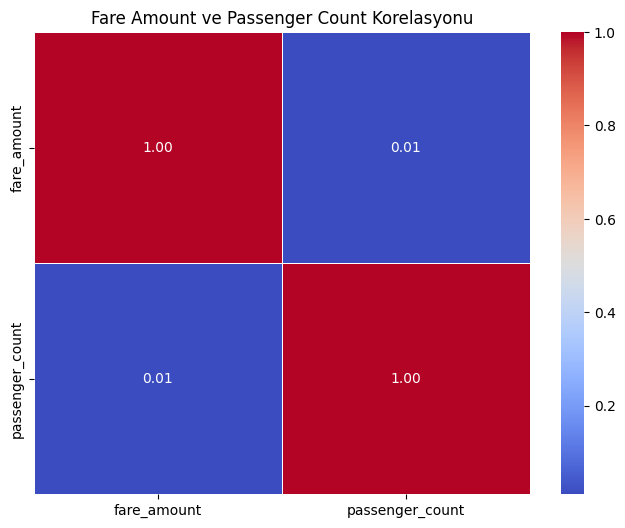

In [35]:
# Fare amount ve passenger count arasındaki korelasyon
correlation_matrix = df[['fare_amount', 'passenger_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Fare Amount ve Passenger Count Correlation')
plt.show()
